In [1]:
import pandas as pd
import plotly.graph_objects as go
from lmfit.models import LinearModel

import plotly.io as pio

# options for live figures
config = {
    "scrollZoom": True,
    "toImageButtonOptions": {
        "format": "svg",
        "scale": 2,
    },
}

# Need this so cell outputs work in Quarto
pio.renderers.default = "notebook"

# Register figure template
temp1 = go.layout.Template()

temp1.layout.update(
    {
        "margin": dict(l=70, r=10, t=10, b=50),
        "font": dict(size=14),
        "width": 600,
        "height": 400,
        "autosize": False,
        "xaxis": dict(
            showline=True,
            linewidth=1,
            linecolor="black",
            mirror=True,
            exponentformat="E",
            showexponent="all",
        ),
        "yaxis": dict(showline=True, linewidth=1, linecolor="black", mirror=True),
        "modebar_add": ["hoverclosest", "hovercompare"],
    }
)

pio.templates["temp1"] = temp1

pio.templates["presentation"].data.scatter = [go.Scatter(line_width=1)]

In [2]:
cal_df = pd.read_csv("rga-cal-factors.csv")
cal_df = cal_df[cal_df["Calibration Candidate?"] == True]
lin_mod = LinearModel()

fit_params = lin_mod.make_params()
fit_params["intercept"].value = 0
fit_params["intercept"].vary = False

fit_result = lin_mod.fit(
    data=cal_df["Expected Mixture Concentration (ppm)"],
    x=cal_df["129/40 Hist Mean"] * 1e6,
    params=fit_params,
)

In [3]:
fit_result

In [4]:
# | label: rga-cal-curve

cal_curve = go.Figure()

fit_trace = go.Scatter(
    x=cal_df["129/40 Hist Mean"],
    y=fit_result.eval(),
    mode="lines",
    name=f"m = {fit_result.params['slope'].value:.3g} ± {fit_result.params['slope'].stderr:.1g} <br> b = {fit_result.params['intercept'].value:.2g}",
)

cal_trace = go.Scatter(
    x=cal_df["129/40 Hist Mean"],
    y=cal_df["Expected Mixture Concentration (ppm)"],
    mode="markers",
    name="Calibration Data",
)

cal_curve.add_traces([cal_trace, fit_trace])

cal_curve.update_layout(
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    template="presentation+temp1",
    xaxis_title="129/40 RGA Response",
    yaxis_title="Xenon Mole Fraction x 10<sup>6</sup>",
)

cal_curve.show(config=config)

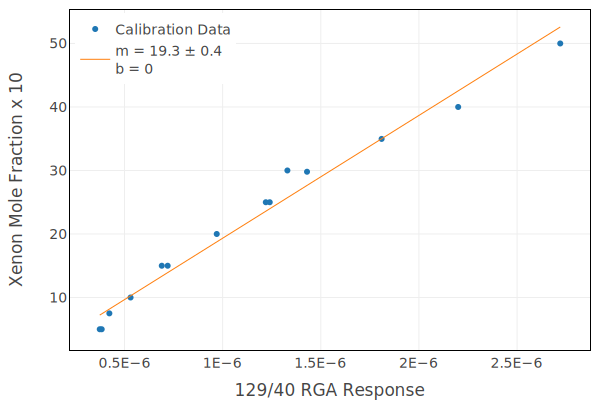

In [5]:
# | label: rga-cal-curve-svg

cal_curve.show(renderer="svg")